# Statistical and Machine Learning

## Individual Project

 Ashwani Nitharwal

### Importing necessary libraries

In [104]:
# Set environment params
Sys.setenv(LANG='en')  # English

# Import libraries
library(data.table)  # Data manipulate
library(plotrix)     # Draw circle
library(tree)
library(e1071)
library(dplyr)
library(kknn)

# Import libraries
library(mlr)           # ML toolkit
library(caret)         # ML toolkit
library(nnet)          # class.ind() function
library(neuralnet)     # Deep Neural Networks
library(LiblineaR)     # LR Lasso (l1)
library(randomForest)  # Random Forest
library(adabag)        # Boosting
library(e1071)         # SVM
library(ggplot2)       # Visualization
library(plotly)        # 3D visualization
library(cvAUC)

library(repr)  # String and binary representations
library(caret) 			# for general data preparation and model fitting
library(rpart.plot)
library(xgboost)
library(tidyverse)
# options(repr.plot.width=4, repr.plot.height=4)

R.version.string


Attaching package: 'kknn'


The following object is masked from 'package:caret':

    contr.dummy




[1] "R version 4.0.5 (2021-03-31)"

In [103]:
#install.packages('kknn')
library(fastDummies)

also installing the dependency 'igraph'




package 'igraph' successfully unpacked and MD5 sums checked
package 'kknn' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\anitharwal\AppData\Local\Temp\Rtmpe4CEFM\downloaded_packages


In [11]:
options(repr.matrix.max.cols=150)

### Data Importing

In [12]:
# Input variables
# Group 1 - Bank client data:

# 1 - client_id : unique ID of the client (numeric)
# 2 - age : client age (numeric)
# 3 - job : type of job (categorical: 'admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
# 4 - marital : marital status (categorical: 'divorced', 'married', 'single', 'unknown'; note: 'divorced' means divorced or widowed)
# 5 - education (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
# 6 - default : has credit in default? (categorical: 'no', 'yes', 'unknown')
# 7 - housing : has housing loan? (categorical: 'no', 'yes', 'unknown')
# 8 - loan : has personal loan? (categorical: 'no', 'yes', 'unknown')

# Group 2: Related with the last contact of the current campaign:
# 9 - contact : contact communication type (categorical: 'cellular', 'telephone')
# 10 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', …, 'nov', 'dec')
# 11 - dayofweek : last contact day of the week (categorical: 'mon', 'tue', 'wed', 'thu', 'fri')

# Group 3: Other attributes:
# 12 - campaign : number of contacts performed during this campaign and for this client (numeric, includes last contact)
# 13 - pdays : number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
# 14 - previous : number of contacts performed before this campaign and for this client (numeric)
# 15 - poutcome : outcome of the previous marketing campaign (categorical: 'failure', 'nonexistent', 'success')

# Group 4: Social and economic context attributes
# 16 - emp.var.rate : employment variation rate - quarterly indicator (numeric)
# 17 - cons.price.idx : consumer price index - monthly indicator (numeric)
# 18 - cons.conf.idx : consumer confidence index - monthly indicator (numeric)
# 19 - euribor3m : euribor 3 month rate - daily indicator (numeric)
# 20 - nr.employed : number of employees - quarterly indicator (numeric)

# Target variable
# 21 - subscribe : has the client subscribed a term deposit? (numeric: 1='yes', 0='no')

In [13]:
bank_data <- read.csv('bank_mkt_train.csv')
head(bank_data)

,client_id,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe
,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,29925,42,management,married,basic.9y,no,no,no,cellular,jul,thu,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0
2,37529,35,unemployed,married,university.degree,no,yes,no,telephone,jun,mon,4,999,0,nonexistent,1.4,94.465,-41.8,4.960,5228.1,0
3,2757,44,technician,married,basic.9y,no,yes,yes,cellular,may,mon,1,999,0,nonexistent,-1.8,92.893,-46.2,1.264,5099.1,0
4,9642,45,services,married,high.school,no,yes,no,cellular,apr,tue,1,999,0,nonexistent,-1.8,93.075,-47.1,1.453,5099.1,0
5,14183,45,unknown,married,unknown,unknown,unknown,unknown,telephone,may,wed,1,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0
6,15180,38,technician,married,professional.course,no,no,no,telephone,may,wed,2,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,0


### Checking NAs

In [14]:
sum(is.na(bank_data$client_id))
sum(is.na(bank_data$age))
sum(is.na(bank_data$job))
sum(is.na(bank_data$marital))
sum(is.na(bank_data$education))
sum(is.na(bank_data$default))
sum(is.na(bank_data$housing))
sum(is.na(bank_data$loan))
sum(is.na(bank_data$contact))
sum(is.na(bank_data$month))
sum(is.na(bank_data$day_of_week))
sum(is.na(bank_data$campaign))
sum(is.na(bank_data$pdays))
sum(is.na(bank_data$previous))
sum(is.na(bank_data$poutcome))
sum(is.na(bank_data$emp.var.rate))
sum(is.na(bank_data$cons.price.idx))
sum(is.na(bank_data$cons.conf.idx))
sum(is.na(bank_data$euribor3m))
sum(is.na(bank_data$nr.employed))

[1] 0

[1] 202

[1] 161

[1] 199

[1] 170

[1] 214

[1] 195

[1] 219

[1] 217

[1] 199

[1] 185

[1] 203

[1] 185

[1] 209

[1] 175

[1] 165

[1] 181

[1] 197

[1] 204

[1] 184

### Resolving NAs

Removed NAs by replacing them with:

-  mean (for numerical columns) or 

-  most occuring values (for categorical features)

In [15]:
#age NA resolve
bank_data[is.na(bank_data$age),]$age <- round(mean(bank_data$age, na.rm = TRUE))

In [16]:
#job NA resolve
temp <- bank_data %>% count(job)
bank_data[is.na(bank_data$job)|bank_data$job=='unknown',]$job <- temp[order(-temp$n),][1,1]

In [17]:
#marital NA resolve
temp <- bank_data %>% count(marital)
bank_data[is.na(bank_data$marital)|bank_data$marital=='unknown',]$marital <- temp[order(-temp$n),][1,1]

In [18]:
#education NA resolve
temp <- bank_data %>% count(education)
bank_data[is.na(bank_data$education)|bank_data$education=='unknown',]$education <- temp[order(-temp$n),][1,1]

In [19]:
#default NA resolve
temp <- bank_data %>% count(default)
bank_data[is.na(bank_data$default)|bank_data$default=='unknown',]$default <- temp[order(-temp$n),][1,1]

In [20]:
#housing NA resolve
temp <- bank_data %>% count(housing)
bank_data[is.na(bank_data$housing)|bank_data$housing=='unknown',]$housing <- temp[order(-temp$n),][1,1]

In [21]:
#loan NA resolve
temp <- bank_data %>% count(loan)
bank_data[is.na(bank_data$loan)|bank_data$loan=='unknown',]$loan <- temp[order(-temp$n),][1,1]

In [22]:
#contact NA resolve
temp <- bank_data %>% count(contact)
bank_data[is.na(bank_data$contact)|bank_data$contact=='unknown',]$contact <- temp[order(-temp$n),][1,1]

In [23]:
#month NA resolve
temp <- bank_data %>% count(month)
bank_data[is.na(bank_data$month)|bank_data$month=='unknown',]$month <- temp[order(-temp$n),][1,1]

In [24]:
#day_of_week NA resolve
temp <- bank_data %>% count(day_of_week)
bank_data[is.na(bank_data$day_of_week)|bank_data$day_of_week=='unknown',]$day_of_week <- temp[order(-temp$n),][1,1]

In [25]:
#campaign NA resolve
temp <- bank_data %>% count(campaign)
bank_data[is.na(bank_data$campaign)|bank_data$campaign=='unknown',]$campaign <- temp[order(-temp$n),][1,1]

In [26]:
#pdays NA resolve
temp <- bank_data %>% count(pdays)
bank_data[is.na(bank_data$pdays)|bank_data$pdays=='unknown',]$pdays <- temp[order(-temp$n),][1,1]

In [27]:
#previous NA resolve
temp <- bank_data %>% count(previous)
bank_data[is.na(bank_data$previous)|bank_data$previous=='unknown',]$previous <- temp[order(-temp$n),][1,1]

In [28]:
#poutcome NA resolve
temp <- bank_data %>% count(poutcome)
bank_data[is.na(bank_data$poutcome)|bank_data$poutcome=='unknown',]$poutcome <- temp[order(-temp$n),][1,1]

In [29]:
#emp.var.rate NA resolve
temp <- bank_data %>% count(emp.var.rate)
bank_data[is.na(bank_data$emp.var.rate),]$emp.var.rate <- temp[order(-temp$n),][1,1]

In [30]:
#cons.price.idx NA resolve
temp <- bank_data %>% count(cons.price.idx)
bank_data[is.na(bank_data$cons.price.idx),]$cons.price.idx <- temp[order(-temp$n),][1,1]

In [31]:
#cons.conf.idx NA resolve
temp <- bank_data %>% count(cons.conf.idx)
bank_data[is.na(bank_data$cons.conf.idx),]$cons.conf.idx <- temp[order(-temp$n),][1,1]

In [32]:
#euribor3m NA resolve
temp <- bank_data %>% count(euribor3m)
bank_data[is.na(bank_data$euribor3m),]$euribor3m <- temp[order(-temp$n),][1,1]

In [33]:
#nr.employed NA resolve
temp <- bank_data %>% count(nr.employed)
bank_data[is.na(bank_data$nr.employed),]$nr.employed <- temp[order(-temp$n),][1,1]

In [34]:
#confirming the NA values
sum(is.na(bank_data))

[1] 0

### Table with no Null Values

In [35]:
head(bank_data)

,client_id,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe
,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,29925,42,management,married,basic.9y,no,no,no,cellular,jul,thu,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0
2,37529,35,unemployed,married,university.degree,no,yes,no,telephone,jun,mon,4,999,0,nonexistent,1.4,94.465,-41.8,4.960,5228.1,0
3,2757,44,technician,married,basic.9y,no,yes,yes,cellular,may,mon,1,999,0,nonexistent,-1.8,92.893,-46.2,1.264,5099.1,0
4,9642,45,services,married,high.school,no,yes,no,cellular,apr,tue,1,999,0,nonexistent,-1.8,93.075,-47.1,1.453,5099.1,0
5,14183,45,admin.,married,university.degree,no,yes,no,telephone,may,wed,1,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0
6,15180,38,technician,married,professional.course,no,no,no,telephone,may,wed,2,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,0


### Dealing with non-numerical columns

- converting to {0,1} if binary column
- creating dummy columns for other categorical non-numeric columns

In [36]:
#Dealing with non-numerical columns
bank_data$default <- ifelse(bank_data$default=='yes',1,0)
bank_data$housing <- ifelse(bank_data$housing=='yes',1,0)
bank_data$loan <- ifelse(bank_data$loan=='yes',1,0)
bank_data$contact <- ifelse(bank_data$contact=='cellular',1,0)

In [37]:
#creating dummy variables for categorical data
data <- fastDummies::dummy_cols(bank_data)

In [38]:
#removing the categorical data columns
data <- subset(data, select = -c(job,marital,education,month,day_of_week,poutcome))

### Basetable 

In [39]:
head(data)

,client_id,age,default,housing,loan,contact,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,29925,42,0,0,0,1,1,999,0,1.4,93.918,-42.7,4.968,5228.1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,37529,35,0,1,0,0,4,999,0,1.4,94.465,-41.8,4.960,5228.1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
3,2757,44,0,1,1,1,1,999,0,-1.8,92.893,-46.2,1.264,5099.1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,9642,45,0,1,0,1,1,999,0,-1.8,93.075,-47.1,1.453,5099.1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
5,14183,45,0,1,0,0,1,999,0,1.1,93.994,-36.4,4.859,5191.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
6,15180,38,0,0,0,0,2,999,0,1.1,93.994,-36.4,4.858,5191.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0


In [40]:
#saving basetable to a file
write.csv(data,"basetable.csv", row.names = FALSE)

## Data Overview

In [41]:
data <- read.csv("basetable.csv")

In [42]:
str(data)

'data.frame':	20000 obs. of  54 variables:
 $ client_id                    : int  29925 37529 2757 9642 14183 15180 27168 9097 30538 28981 ...
 $ age                          : int  42 35 44 45 45 38 33 38 29 34 ...
 $ default                      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ housing                      : int  0 1 1 1 1 0 0 1 1 1 ...
 $ loan                         : int  0 0 1 0 0 0 1 0 0 1 ...
 $ contact                      : int  1 0 1 1 0 0 1 0 1 1 ...
 $ campaign                     : int  1 4 1 1 1 2 1 1 1 1 ...
 $ pdays                        : int  999 999 999 999 999 999 999 999 999 999 ...
 $ previous                     : int  0 0 0 0 0 0 1 0 1 0 ...
 $ emp.var.rate                 : num  1.4 1.4 -1.8 -1.8 1.1 1.1 -1.8 1.1 -1.8 1.4 ...
 $ cons.price.idx               : num  93.9 94.5 92.9 93.1 94 ...
 $ cons.conf.idx                : num  -42.7 -41.8 -46.2 -47.1 -36.4 -36.4 -47.1 -36.4 -46.2 -36.1 ...
 $ euribor3m                    : num  4.97 4.96 1.26 1.45 4.86 ...

### Feature selection
- Linear Regression Model

In [43]:
# Running a linear Regression Model to know the contribution of variable to the target variable
md_full <- lm(subscribe ~ ., data=data)
summary(md_full)


Call:
lm(formula = subscribe ~ ., data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.94582 -0.08220 -0.05354 -0.02808  1.03873 

Coefficients: (6 not defined because of singularities)
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   -1.666e+00  1.829e+00  -0.911  0.36226    
client_id                     -7.909e-08  1.679e-07  -0.471  0.63761    
age                            2.773e-04  2.449e-04   1.132  0.25748    
default                       -3.320e-02  1.998e-01  -0.166  0.86803    
housing                       -1.217e-03  4.036e-03  -0.302  0.76295    
loan                           7.038e-04  5.589e-03   0.126  0.89979    
contact                        3.872e-02  7.281e-03   5.318 1.06e-07 ***
campaign                      -2.007e-03  7.325e-04  -2.740  0.00615 ** 
pdays                         -2.235e-04  3.446e-05  -6.485 9.10e-11 ***
previous                      -2.722e-03  9.356e-03  -0.291  0

In [44]:
# Running again with only important features selected
md_full <- lm(subscribe ~ contact  + pdays + emp.var.rate + cons.price.idx + cons.conf.idx + month_dec + month_jul + month_mar + day_of_week_mon + poutcome_failure + poutcome_nonexistent, data=data)
summary(md_full)


Call:
lm(formula = subscribe ~ contact + pdays + emp.var.rate + cons.price.idx + 
    cons.conf.idx + month_dec + month_jul + month_mar + day_of_week_mon + 
    poutcome_failure + poutcome_nonexistent, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.94283 -0.08325 -0.05617 -0.03361  1.16101 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -1.365e+01  6.384e-01 -21.377  < 2e-16 ***
contact               8.701e-02  5.963e-03  14.593  < 2e-16 ***
pdays                -2.457e-04  3.297e-05  -7.453 9.47e-14 ***
emp.var.rate         -9.223e-02  2.380e-03 -38.758  < 2e-16 ***
cons.price.idx        1.542e-01  6.823e-03  22.604  < 2e-16 ***
cons.conf.idx         9.711e-03  4.908e-04  19.788  < 2e-16 ***
month_dec             9.682e-02  2.984e-02   3.244  0.00118 ** 
month_jul             4.063e-02  6.249e-03   6.502 8.10e-11 ***
month_mar             2.752e-01  1.885e-02  14.596  < 2e-16 ***
day_of_week_mon      -2.1

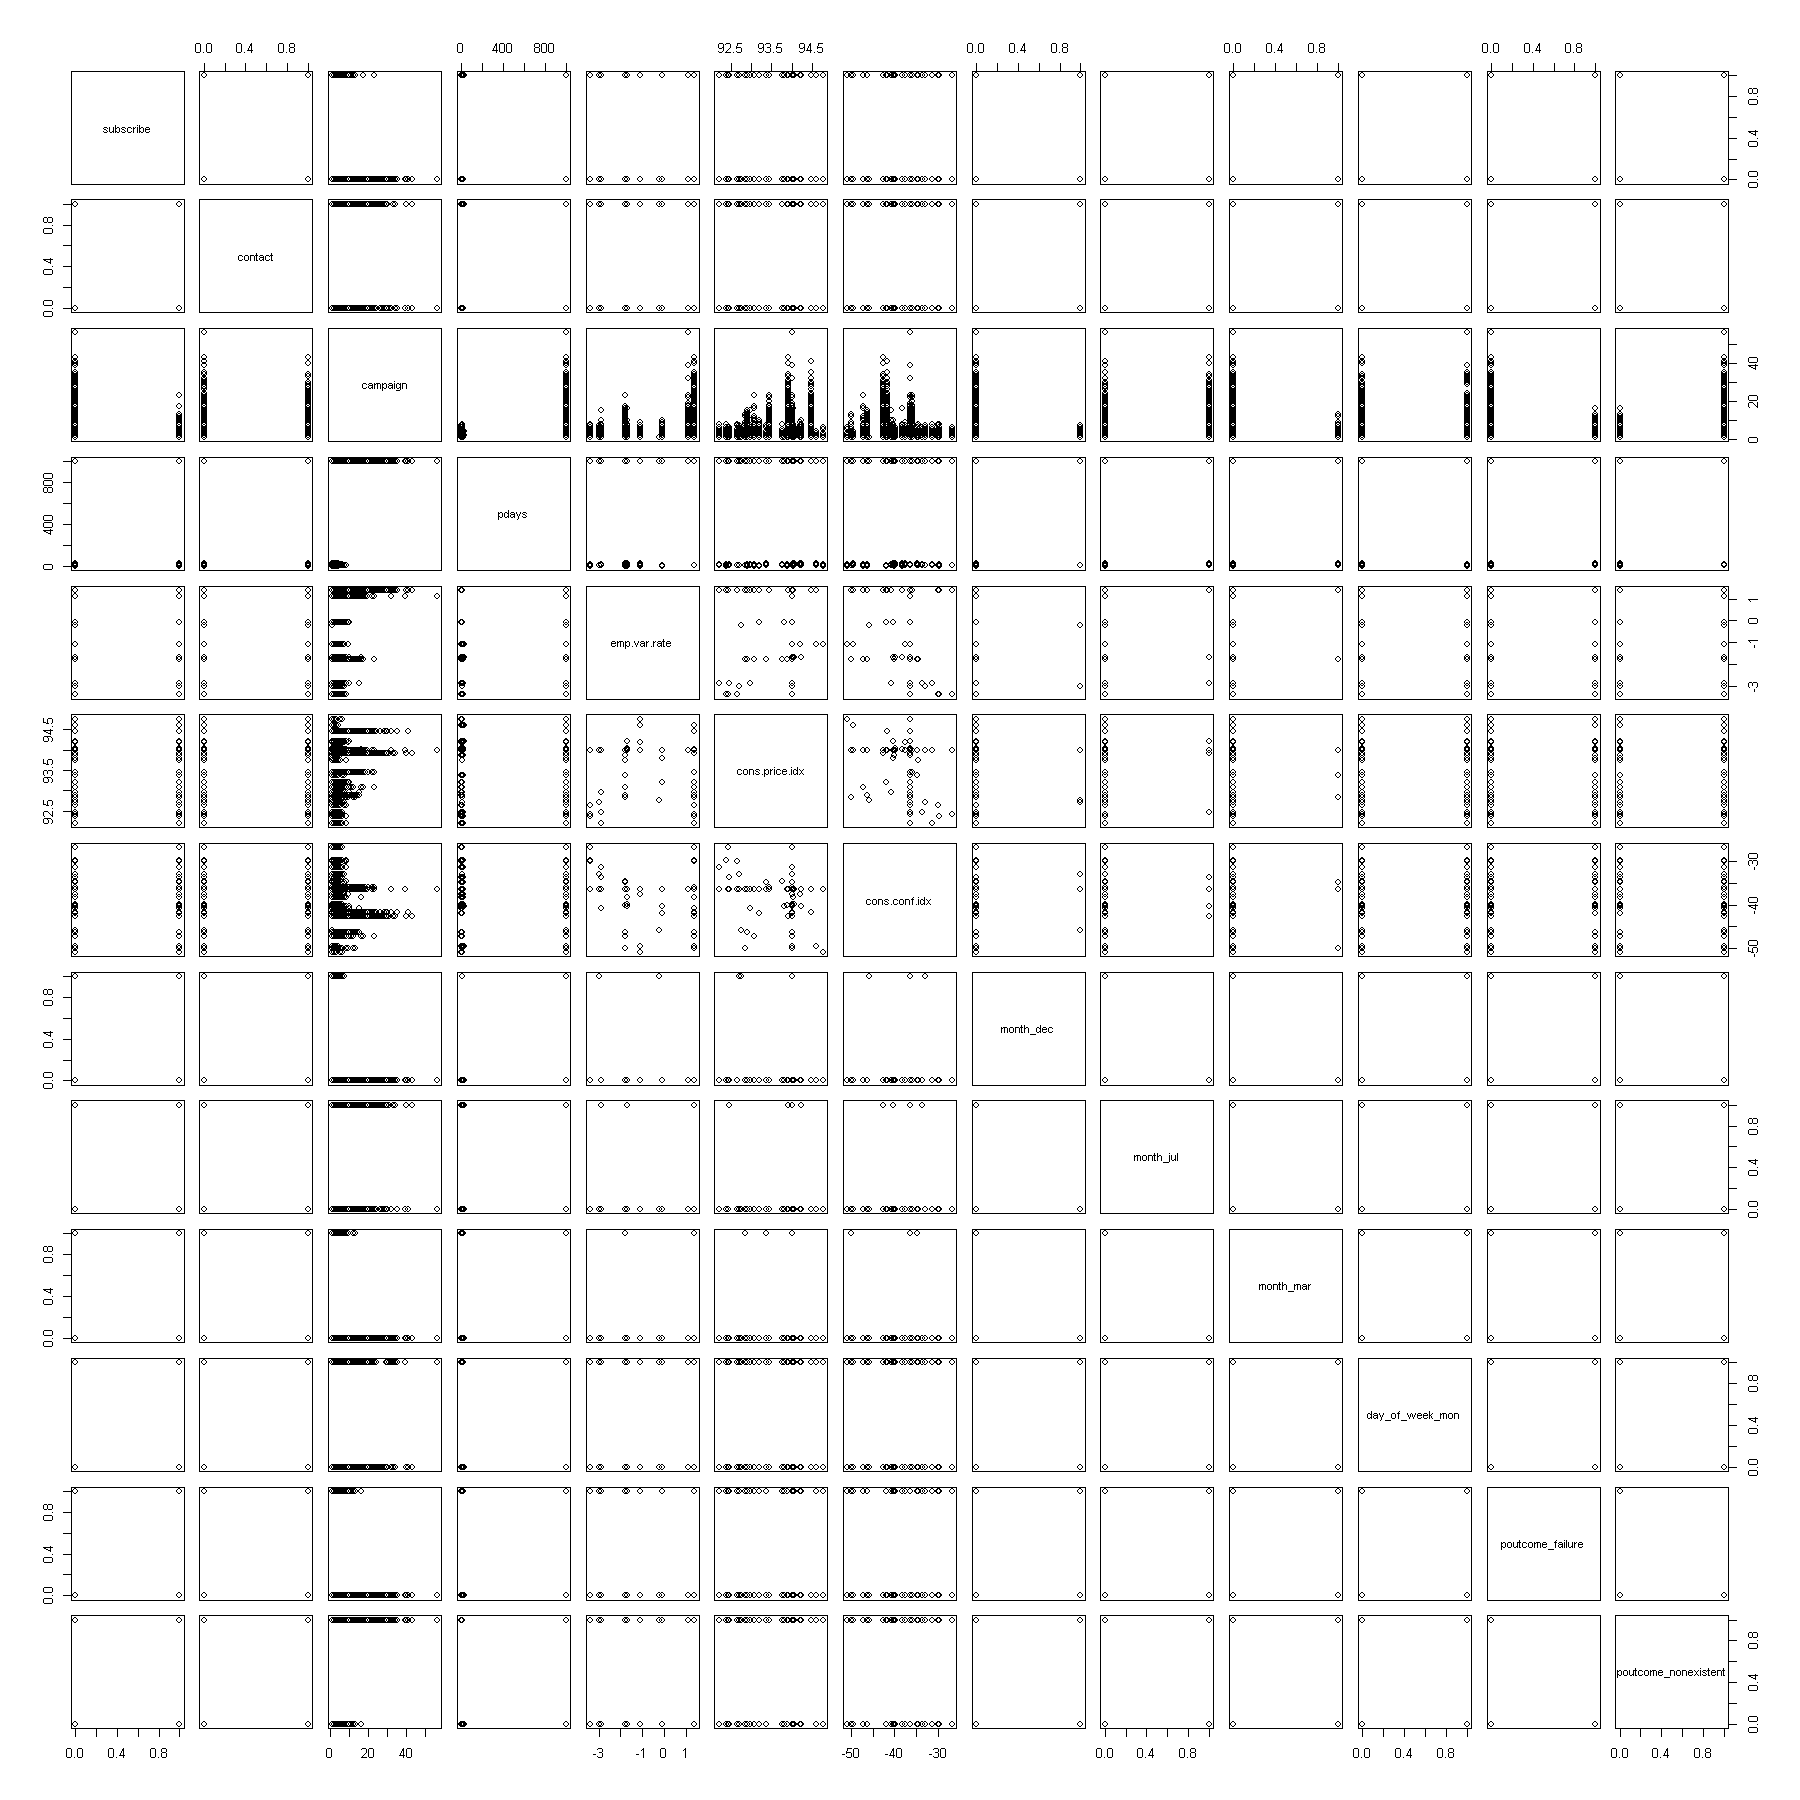

In [45]:
#Checking out the relation between features and target
options(repr.plot.width=15, repr.plot.height=15)
pairs(subscribe ~ contact + campaign + pdays + emp.var.rate + cons.price.idx + cons.conf.idx + month_dec + month_jul + month_mar + day_of_week_mon + poutcome_failure + poutcome_nonexistent, data=data)

In [46]:
#feature selected by linear regression 
f_by_lg <- c('contact', 'pdays', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'month_dec', 'month_jul', 'month_mar', 'day_of_week_mon', 'poutcome_failure', 'poutcome_nonexistent')

- Boruta method

In [47]:
#to know the contribution of variable to the target variable
#install.packages('Boruta')
library(Boruta)
boruta_output <- Boruta(subscribe ~ ., data=data, doTrace=0) 

Computing permutation importance.. Progress: 94%. Estimated remaining time: 1 seconds.
Computing permutation importance.. Progress: 68%. Estimated remaining time: 14 seconds.
Computing permutation importance.. Progress: 91%. Estimated remaining time: 2 seconds.
Computing permutation importance.. Progress: 94%. Estimated remaining time: 2 seconds.
Computing permutation importance.. Progress: 85%. Estimated remaining time: 5 seconds.
Computing permutation importance.. Progress: 93%. Estimated remaining time: 2 seconds.
Computing permutation importance.. Progress: 82%. Estimated remaining time: 6 seconds.
Computing permutation importance.. Progress: 88%. Estimated remaining time: 4 seconds.
Computing permutation importance.. Progress: 83%. Estimated remaining time: 6 seconds.
Computing permutation importance.. Progress: 84%. Estimated remaining time: 5 seconds.
Computing permutation importance.. Progress: 80%. Estimated remaining time: 7 seconds.
Computing permutation importance.. Progres

In [48]:
names(boruta_output)

[1] "finalDecision" "ImpHistory"    "pValue"        "maxRuns"      
 [5] "light"         "mcAdj"         "timeTaken"     "roughfixed"   
 [9] "call"          "impSource"

In [49]:
# Get significant variables including tentatives
boruta_signif <- getSelectedAttributes(boruta_output, withTentative = TRUE)
print(boruta_signif)

 [1] "age"                         "contact"                    
 [3] "campaign"                    "pdays"                      
 [5] "previous"                    "emp.var.rate"               
 [7] "cons.price.idx"              "cons.conf.idx"              
 [9] "euribor3m"                   "nr.employed"                
[11] "job_blue.collar"             "job_retired"                
[13] "job_student"                 "marital_married"            
[15] "marital_single"              "education_basic.9y"         
[17] "education_university.degree" "month_apr"                  
[19] "month_aug"                   "month_dec"                  
[21] "month_jul"                   "month_jun"                  
[23] "month_mar"                   "month_may"                  
[25] "month_nov"                   "month_oct"                  
[27] "month_sep"                   "day_of_week_fri"            
[29] "day_of_week_mon"             "day_of_week_thu"            
[31] "day_of_week_tue"   

In [50]:
# Do a tentative rough fix
roughFixMod <- TentativeRoughFix(boruta_output)
boruta_signif <- getSelectedAttributes(roughFixMod)
print(boruta_signif)

 [1] "age"                         "contact"                    
 [3] "campaign"                    "pdays"                      
 [5] "previous"                    "emp.var.rate"               
 [7] "cons.price.idx"              "cons.conf.idx"              
 [9] "euribor3m"                   "nr.employed"                
[11] "job_blue.collar"             "job_retired"                
[13] "marital_married"             "marital_single"             
[15] "education_university.degree" "month_apr"                  
[17] "month_aug"                   "month_jul"                  
[19] "month_jun"                   "month_mar"                  
[21] "month_may"                   "month_nov"                  
[23] "month_oct"                   "month_sep"                  
[25] "day_of_week_fri"             "day_of_week_mon"            
[27] "day_of_week_thu"             "day_of_week_tue"            
[29] "day_of_week_wed"             "poutcome_failure"           
[31] "poutcome_nonexisten

In [51]:
# Variable Importance Scores
imps <- attStats(roughFixMod)
imps2 = imps[imps$decision != 'Rejected', c('meanImp', 'decision')]
head(imps2[order(-imps2$meanImp), ])  # descending sort

,meanImp,decision
,<dbl>,<fct>
euribor3m,35.58161,Confirmed
nr.employed,27.46978,Confirmed
cons.price.idx,26.48141,Confirmed
cons.conf.idx,25.02289,Confirmed
month_oct,24.50419,Confirmed
emp.var.rate,23.39050,Confirmed


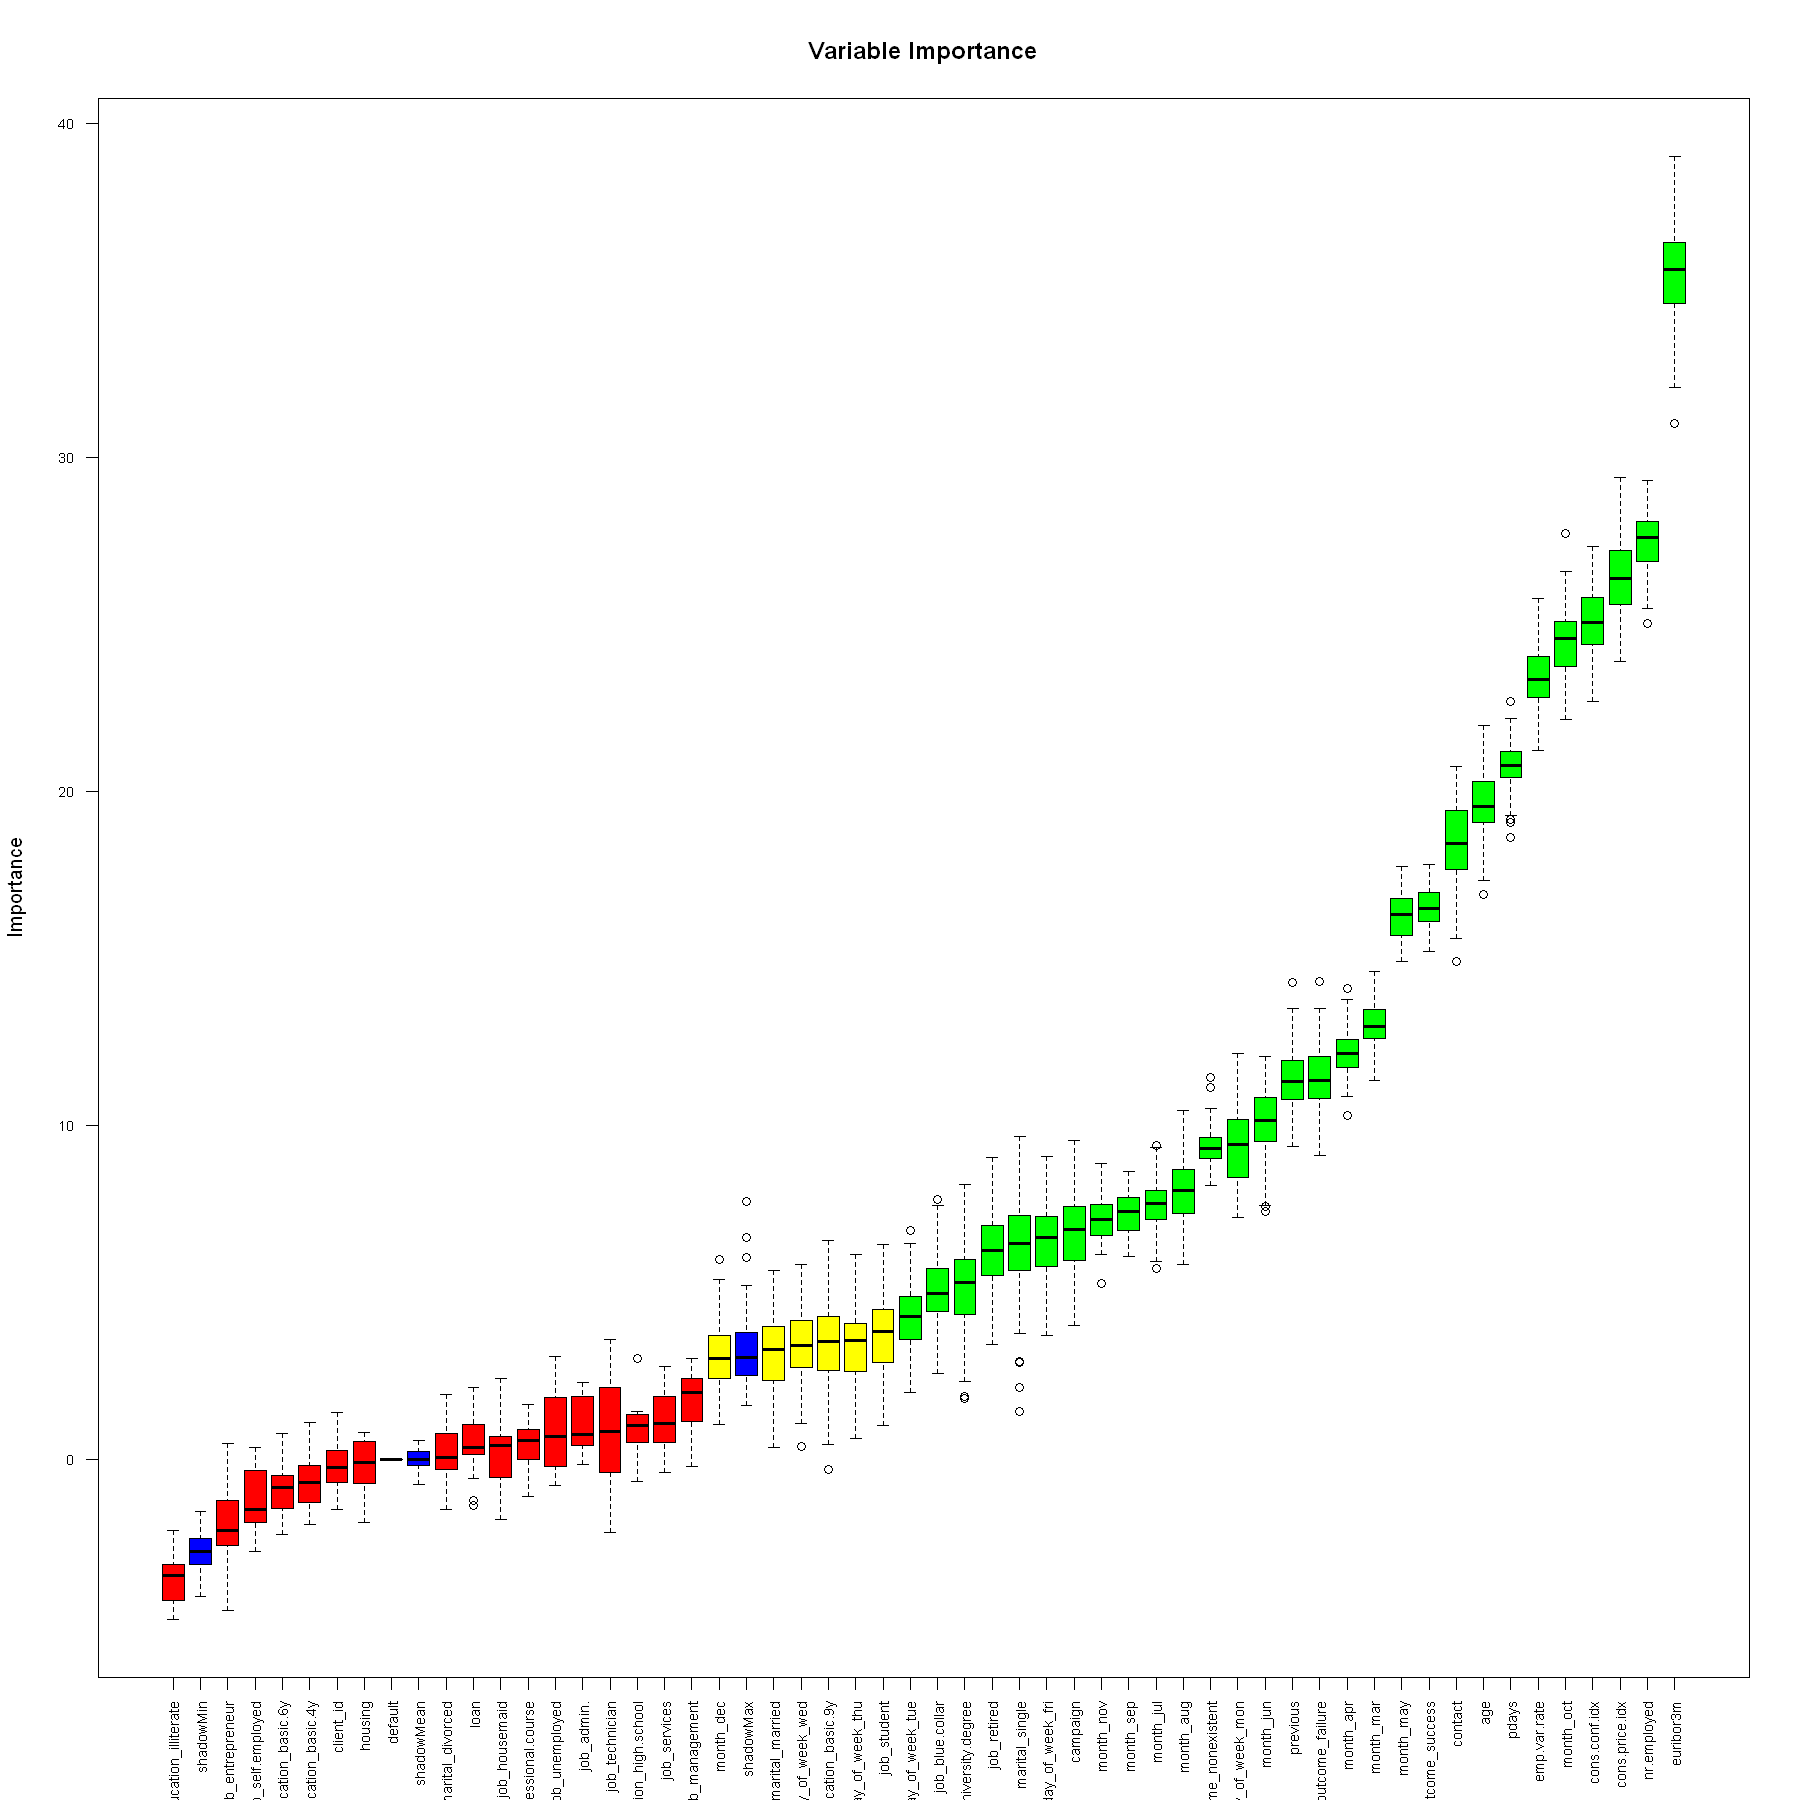

In [52]:
# Plot variable importance
plot(boruta_output, cex.axis=.7, las=2, xlab="", main="Variable Importance") 

In [53]:
#features selected by Boruto method
f_by_boruto <- rownames(imps2[order(-imps2$meanImp), ])

- Rpart model

In [54]:
# Train an rpart method model and compute variable importance.
library(caret)
set.seed(123)
rPartMod <- train(subscribe ~ ., data=data, method="rpart")
rpartImp <- varImp(rPartMod)
print(rpartImp)

Warning message in train.default(x, y, weights = w, ...):
"You are trying to do regression and your outcome only has two possible values Are you trying to do classification? If so, use a 2 level factor as your outcome column."
Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."


rpart variable importance

  only 20 most important variables shown (out of 53)

                      Overall
pdays                 100.000
poutcome_success       95.983
nr.employed            80.897
euribor3m              65.254
emp.var.rate           40.471
poutcome_nonexistent   10.034
previous                9.657
job_retired             0.000
day_of_week_fri         0.000
education_high.school   0.000
default                 0.000
job_blue.collar         0.000
day_of_week_mon         0.000
education_basic.6y      0.000
cons.price.idx          0.000
month_oct               0.000
day_of_week_wed         0.000
day_of_week_tue         0.000
contact                 0.000
education_illiterate    0.000


In [55]:
#features selected by the rpart model
f_by_rpart <- c('pdays','poutcome_success','nr.employed','euribor3m','emp.var.rate','poutcome_nonexistent','previous')

- XG Boost

In [57]:
# createDataPartition() function from the caret package to split the original dataset into a training and testing set and split data into training (80%) and testing set (20%)
parts = createDataPartition(data$subscribe, p = .8, list = F)
train = data[parts, ]
test = data[-parts, ]

#define predictor and response variables in training set
train_x = data.matrix(train[, -1])
train_y = train[,1]

#define predictor and response variables in testing set
test_x = data.matrix(test[, -1])
test_y = test[, 1]

#define final training and testing sets
xgb_train = xgb.DMatrix(data = train_x, label = train_y)
xgb_test = xgb.DMatrix(data = test_x, label = test_y)

In [58]:
#defining a watchlist
watchlist = list(train=xgb_train, test=xgb_test)

#fit XGBoost model and display training and testing data at each iteartion
model = xgb.train(data = xgb_train, max.depth = 3, watchlist=watchlist, nrounds = 100)

[1]	train-rmse:18757.736328	test-rmse:18595.638672 
[2]	train-rmse:15627.829102	test-rmse:15510.141602 
[3]	train-rmse:13833.873047	test-rmse:13760.433594 
[4]	train-rmse:12862.960938	test-rmse:12832.257812 
[5]	train-rmse:12355.136719	test-rmse:12360.914062 
[6]	train-rmse:12095.232422	test-rmse:12130.606445 
[7]	train-rmse:11963.181641	test-rmse:12020.831055 
[8]	train-rmse:11896.802734	test-rmse:11972.571289 
[9]	train-rmse:11862.331055	test-rmse:11950.452148 
[10]	train-rmse:11844.495117	test-rmse:11942.876953 
[11]	train-rmse:11832.647461	test-rmse:11940.883789 
[12]	train-rmse:11822.879883	test-rmse:11942.484375 
[13]	train-rmse:11816.888672	test-rmse:11946.744141 
[14]	train-rmse:11809.332031	test-rmse:11945.276367 
[15]	train-rmse:11807.820312	test-rmse:11946.684570 
[16]	train-rmse:11803.928711	test-rmse:11944.680664 
[17]	train-rmse:11799.630859	test-rmse:11949.247070 
[18]	train-rmse:11793.750000	test-rmse:11948.900391 
[19]	train-rmse:11790.622070	test-rmse:11949.285156 
[2

In [59]:
#define final model
model_xgboost = xgboost(data = xgb_train, max.depth = 3, nrounds = 12, verbose = 0)
summary(model_xgboost)

               Length Class              Mode       
handle             1  xgb.Booster.handle externalptr
raw            16418  -none-             raw        
niter              1  -none-             numeric    
evaluation_log     2  data.table         list       
call              14  -none-             call       
params             2  -none-             list       
callbacks          1  -none-             list       
feature_names     53  -none-             character  
nfeatures          1  -none-             numeric    

In [60]:
# Compute feature importance matrix
importance_matrix = xgb.importance(colnames(xgb_train), model = model_xgboost)
importance_matrix

Feature,Gain,Cover,Frequency
<chr>,<dbl>,<dbl>,<dbl>
euribor3m,0.223021938,2.800692e-01,0.19277108
age,0.149362636,2.305220e-01,0.19277108
nr.employed,0.075293019,2.510777e-02,0.04819277
month_jul,0.074381245,1.918413e-03,0.02409639
campaign,0.045443581,6.149858e-02,0.04819277
cons.price.idx,0.040317389,2.872064e-02,0.04819277
job_technician,0.033517164,8.316189e-02,0.03614458
previous,0.032741484,5.103672e-02,0.04819277
loan,0.031668613,7.083370e-04,0.02409639


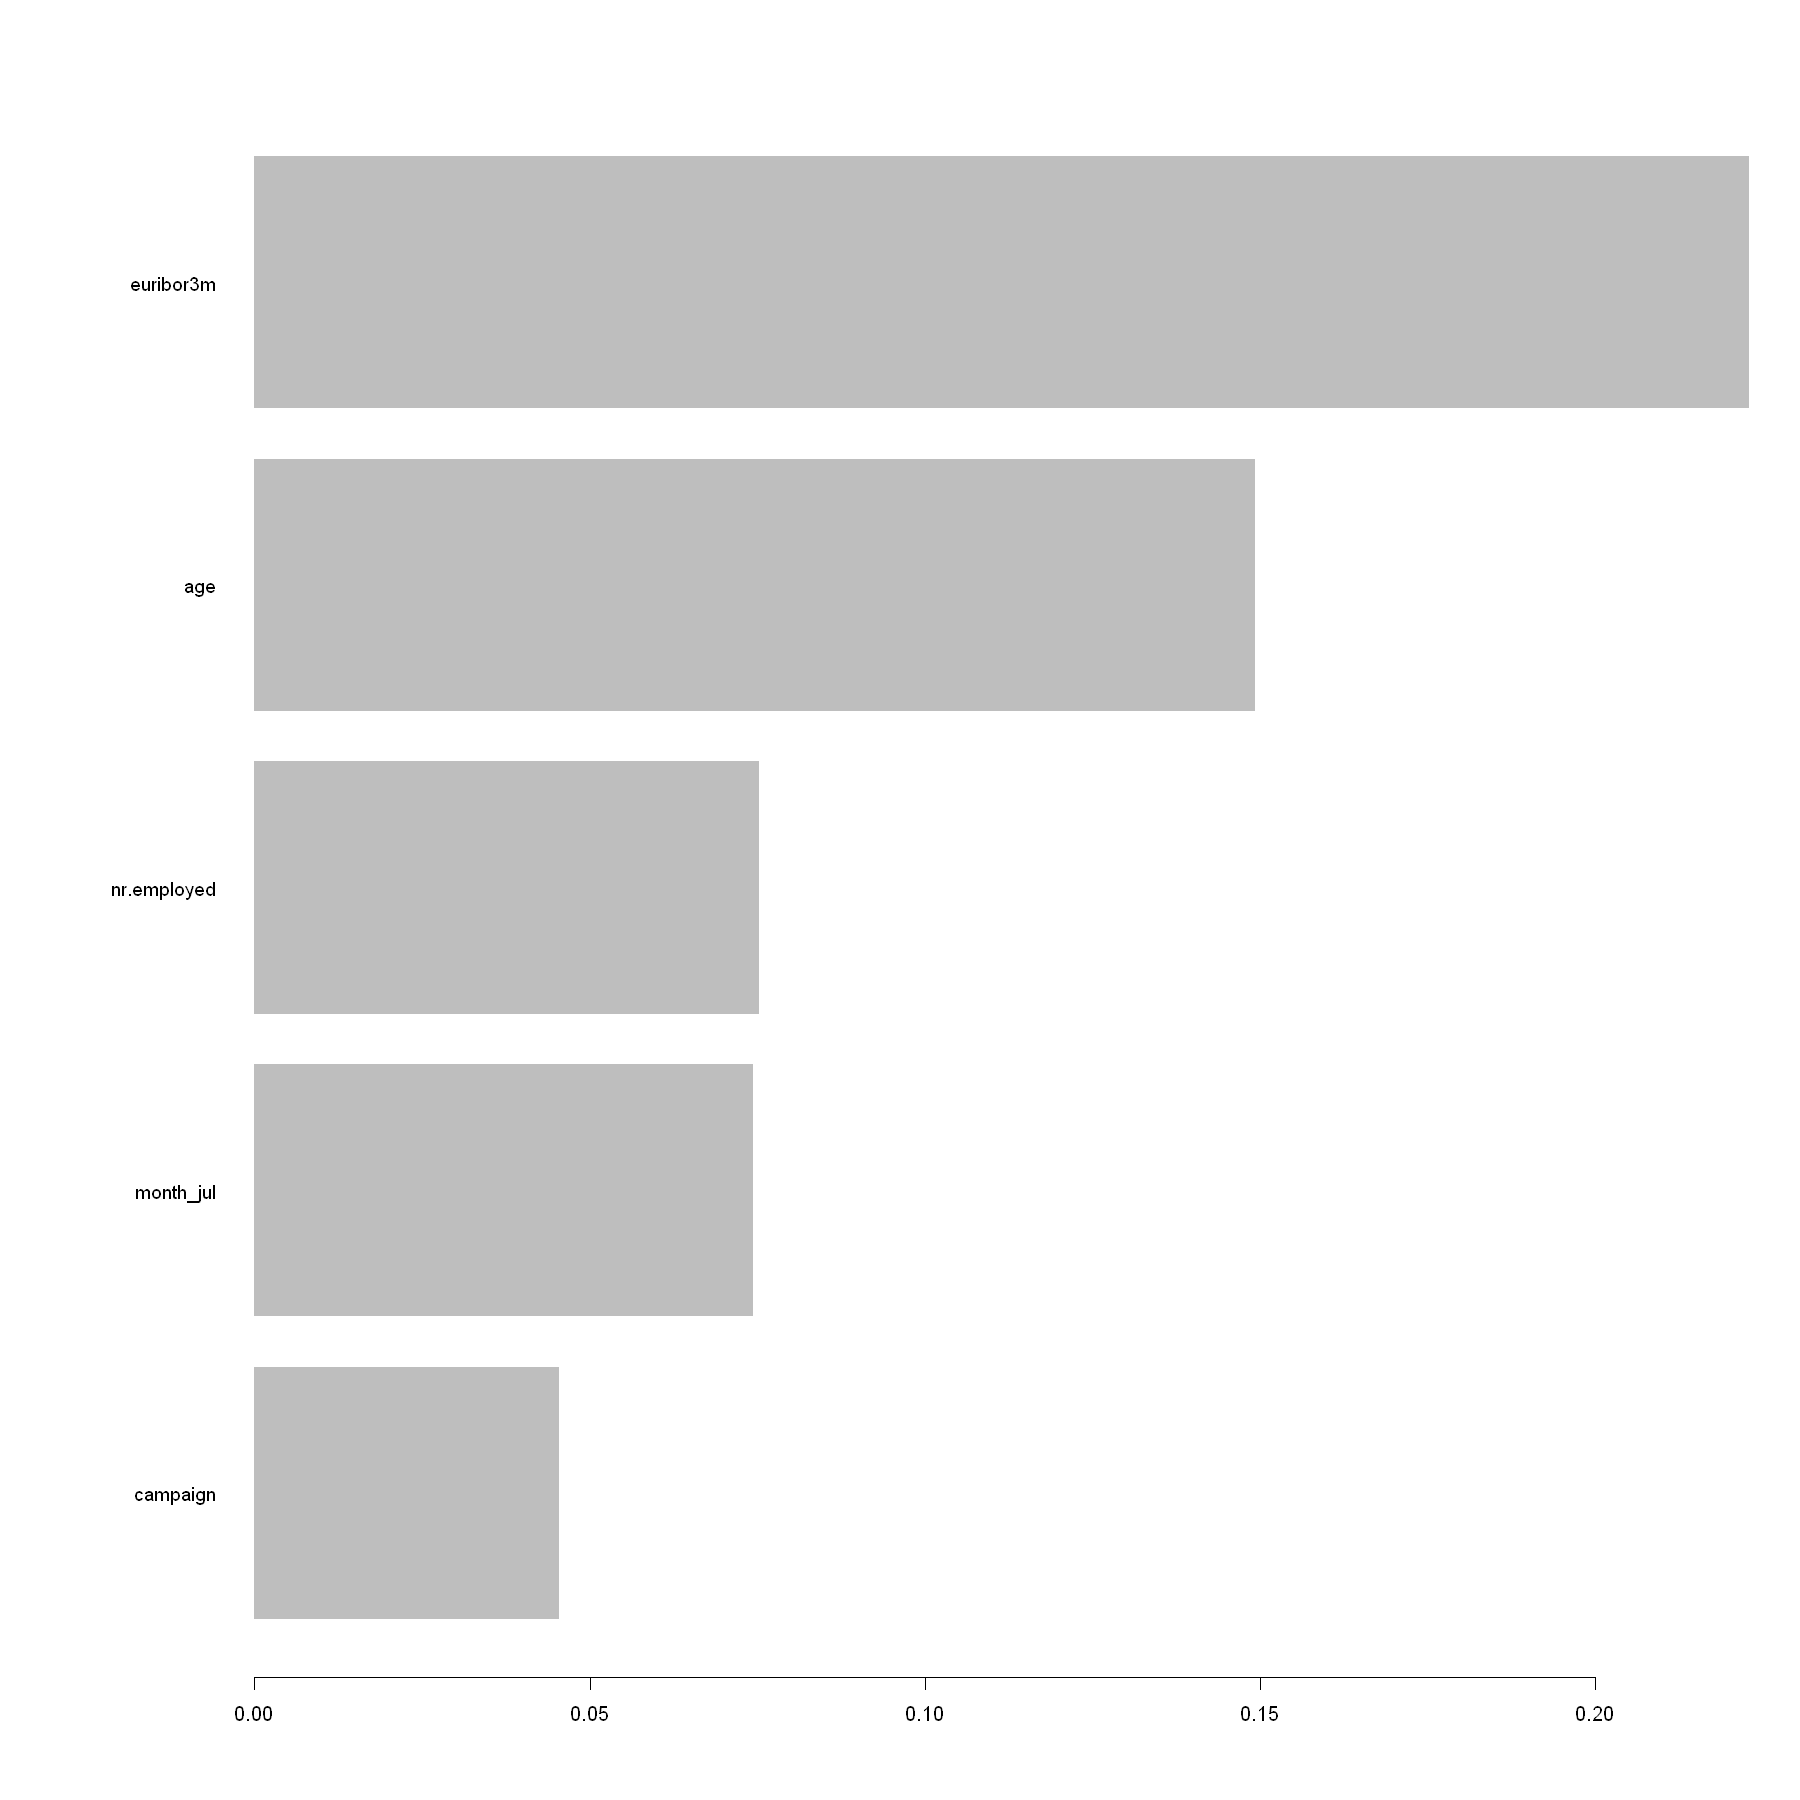

In [61]:
# Nice graph
xgb.plot.importance(importance_matrix[1:5,])

In [62]:
f_by_xgboost <- importance_matrix[1:15,'Feature']

In [63]:
#features selected by xg boost method
f_by_xgboost <- as.matrix(f_by_xgboost)[,1]

In [64]:
str(f_by_xgboost)

 chr [1:15] "euribor3m" "age" "nr.employed" "month_jul" "campaign" ...


- Step-wise Forward and Backward Selection

In [65]:
# Step 1: Define base intercept only model
base.mod <- lm(subscribe ~ 1 , data=data)  

# Step 2: Full model with all predictors
all.mod <- lm(subscribe ~ . , data= data) 

# Step 3: Perform step-wise algorithm. direction='both' implies both forward and backward stepwise
stepMod <- step(base.mod, scope = list(lower = base.mod, upper = all.mod), direction = "both", trace = 0, steps = 1000)  

# Step 4: Get the shortlisted variable.
shortlistedVars <- names(unlist(stepMod[[1]])) 
shortlistedVars <- shortlistedVars[!shortlistedVars %in% "(Intercept)"] # remove intercept

# Show
print(shortlistedVars[1:15])

 [1] "nr.employed"          "pdays"                "month_may"           
 [4] "poutcome_failure"     "month_mar"            "cons.conf.idx"       
 [7] "month_jul"            "day_of_week_mon"      "contact"             
[10] "job_student"          "job_blue.collar"      "job_retired"         
[13] "poutcome_nonexistent" "cons.price.idx"       "emp.var.rate"        


In [66]:
#features selected by stepwise forward aand backward selection
f_by_stepwise <- shortlistedVars[1:15]

### Selecting the final features which are common to all the models

In [67]:
#exploring the features by all methods
print(f_by_lg)
print(f_by_boruto)
print(f_by_rpart)
print(f_by_stepwise)
print(f_by_xgboost)

 [1] "contact"              "pdays"                "emp.var.rate"        
 [4] "cons.price.idx"       "cons.conf.idx"        "month_dec"           
 [7] "month_jul"            "month_mar"            "day_of_week_mon"     
[10] "poutcome_failure"     "poutcome_nonexistent"
 [1] "euribor3m"                   "nr.employed"                
 [3] "cons.price.idx"              "cons.conf.idx"              
 [5] "month_oct"                   "emp.var.rate"               
 [7] "pdays"                       "age"                        
 [9] "contact"                     "poutcome_success"           
[11] "month_may"                   "month_mar"                  
[13] "month_apr"                   "poutcome_failure"           
[15] "previous"                    "month_jun"                  
[17] "poutcome_nonexistent"        "day_of_week_mon"            
[19] "month_aug"                   "month_jul"                  
[21] "month_sep"                   "month_nov"                  
[23] "campai

In [68]:
# selecting the common features in all methods
features <- intersect(c(f_by_lg, f_by_boruto, f_by_rpart, f_by_stepwise), f_by_xgboost)

In [164]:
#number of features
length(features)

[1] 12

In [70]:
#features <- c('contact', 'cons.price.idx', 'cons.conf.idx', 'month_jul', 'month_mar', 'day_of_week_mon', 'euribor3m', 'age', 'previous', 'campaign', 'job_student')

## Models

In [71]:
#reduced data by keeping only the important features
data_reduced <-data[,c(features,'subscribe')]

In [198]:
#selecting the dependent variables and independent variables
id_var <- colnames(data_reduced)[1:12]
d_var <- 'subscribe'
var_all <- c(features,'subscribe')

- Logistic Regression

In [74]:
# Fit logistic regression model on whole reduced data
md_logreg <- glm(subscribe ~ ., data=data_reduced, family='binomial')
summary(md_logreg)


Call:
glm(formula = subscribe ~ ., family = "binomial", data = data_reduced)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9614  -0.3998  -0.3388  -0.2614   2.9021  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)     24.2880536 11.9019660   2.041 0.041283 *  
contact          0.2494093  0.0771212   3.234 0.001221 ** 
pdays           -0.0018414  0.0001115 -16.517  < 2e-16 ***
cons.price.idx   0.1480886  0.0784341   1.888 0.059017 .  
cons.conf.idx    0.0208879  0.0061374   3.403 0.000666 ***
month_jul        0.2730753  0.0805866   3.389 0.000703 ***
day_of_week_mon -0.2498941  0.0635248  -3.934 8.36e-05 ***
euribor3m       -0.2275643  0.0606235  -3.754 0.000174 ***
nr.employed     -0.0071540  0.0011519  -6.211 5.27e-10 ***
age              0.0011572  0.0020972   0.552 0.581089    
month_may       -0.7168834  0.0645546 -11.105  < 2e-16 ***
previous        -0.2758512  0.0502170  -5.493 3.95e-08 ***
campaign        -0.0386657

In [186]:
# Train test separate with stratified
set.seed(123)
train_idx <- createDataPartition(data_reduced$subscribe, p=.7, list=FALSE)
train <- data_reduced[train_idx, ]
test <- data_reduced[-train_idx, ]

In [187]:
# Make prediction on both train and test data
pred_train_prob <- predict(md_logreg, newdata=train, type='response')
head(pred_train_prob)

pred_test_prob <- predict(md_logreg, newdata=test, type='response')
head(pred_test_prob)

1          2          4          5          6          7 
0.07541873 0.03793104 0.21961003 0.03431924 0.03298109 0.17620587

3          8         12         19         23         24 
0.09777512 0.03398055 0.07422308 0.03382365 0.11688114 0.03454322

In [303]:
# Fit Logistic Regression model
md_logreg <- glm(subscribe ~ ., data=train, family='binomial')

# Make prediction
pred_logreg <- predict(md_logreg, newdata=test, type='response')
head(pred_logreg)

# Decision threshold = 0.5
threshold <- 0.5
pred <- rep('No', nrow(test))
pred[pred_logreg > threshold] <- 'Yes'

# Evaluation
table(pred, test$subscribe)
acc <- mean(pred == test$subscribe)
TP <- table(pred, test$subscribe)[2, 2]
TN <- table(pred, test$subscribe)[1, 1]
FP <- table(pred, test$subscribe)[2, 1]
FN <- table(pred, test$subscribe)[1, 2]

print(paste('Accuracy =', round((TP + TN) / (TP + TN + FP + FN),2)))
print(paste('Precision =', round(TP / (TP + FP), 2)))
print(paste('Sensitivity (TPR) =', round(TP / (TP + FN), 2)))
print(paste('Specificity (TNR) =', round(TN / (TN + FP), 2)))


#AUC
auc_logreg <- AUC(pred_logreg, test$subscribe, label.ordering = NULL)
print(paste('AUC of Logistic Regression =',auc_logreg ))

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"


3          8         12         24         34         35 
0.09811904 0.03822214 0.07236673 0.03418881 0.02828046 0.06052923

     
pred     0    1
  No  3525  329
  Yes   38  108

[1] "Accuracy = 0.91"
[1] "Precision = 0.74"
[1] "Sensitivity (TPR) = 0.25"
[1] "Specificity (TNR) = 0.99"
[1] "AUC of Logistic Regression = 0.795359886861597"


In [189]:
# Decision threshold = 0.25
threshold <- 0.25
pred <- rep('No', nrow(test))
pred[pred_logreg > threshold] <- 'Yes'

# Evaluation
table(pred, test$subscribe)
acc <- mean(pred == test$subscribe)
TP <- table(pred, test$subscribe)[2, 2]
TN <- table(pred, test$subscribe)[1, 1]
FP <- table(pred, test$subscribe)[2, 1]
FN <- table(pred, test$subscribe)[1, 2]

print(paste('Accuracy =', round((TP + TN) / (TP + TN + FP + FN),2)))
print(paste('Precision =', round(TP / (TP + FP), 2)))
print(paste('Sensitivity (TPR) =', round(TP / (TP + FN), 2)))
print(paste('Specificity (TNR) =', round(TN / (TN + FP), 2)))



     
pred     0    1
  No  4952  351
  Yes  387  310

[1] "Accuracy = 0.88"
[1] "Precision = 0.44"
[1] "Sensitivity (TPR) = 0.47"
[1] "Specificity (TNR) = 0.93"


In [190]:
# Set up cross-validation
rdesc = makeResampleDesc("CV", iters=10)

# Define the model
lnr_logreg <- makeLearner("classif.logreg", predict.type="prob", fix.factors.prediction=T)

# Define the model
task_logreg <- makeClassifTask( data=data_reduced, target="subscribe")

# Run the k-fold CV
resample(lnr_logreg, task_logreg, rdesc, measures=list(mlr::auc))

Resampling: cross-validation

Measures:             auc       

[Resample] iter 1:    0.7861082 

[Resample] iter 2:    0.7695998 

[Resample] iter 3:    0.8087605 

[Resample] iter 4:    0.7636485 

[Resample] iter 5:    0.8016504 

[Resample] iter 6:    0.8055812 

[Resample] iter 7:    0.7695757 

[Resample] iter 8:    0.7564028 

[Resample] iter 9:    0.7942954 

[Resample] iter 10:   0.7866110 




Aggregated Result: auc.test.mean=0.7842233






Resample Result
Task: data_reduced
Learner: classif.logreg
Aggr perf: auc.test.mean=0.7842233
Runtime: 1.05708

In [305]:
#iter=3 is the best parameter selected by the cross validation
auc_logreg <- 0.7842233 #for iter=3, maximum auc is generated

#AUC
print(paste('AUC of Logistic Regression after cross-validation =',auc_logreg ))

[1] "AUC of Logistic Regression after cross-validation = 0.7842233"


- Decision Tree

In [204]:
# Build simple decision tree model on full dataset
md_tree <- tree(subscribe ~ . , data=data)

In [205]:
summary(md_tree)


Regression tree:
tree(formula = subscribe ~ ., data = data)
Variables actually used in tree construction:
[1] "nr.employed"   "pdays"         "cons.conf.idx"
Number of terminal nodes:  4 
Residual mean deviance:  0.0814 = 1628 / 20000 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.71550 -0.05788 -0.05788  0.00000 -0.05788  0.94210 

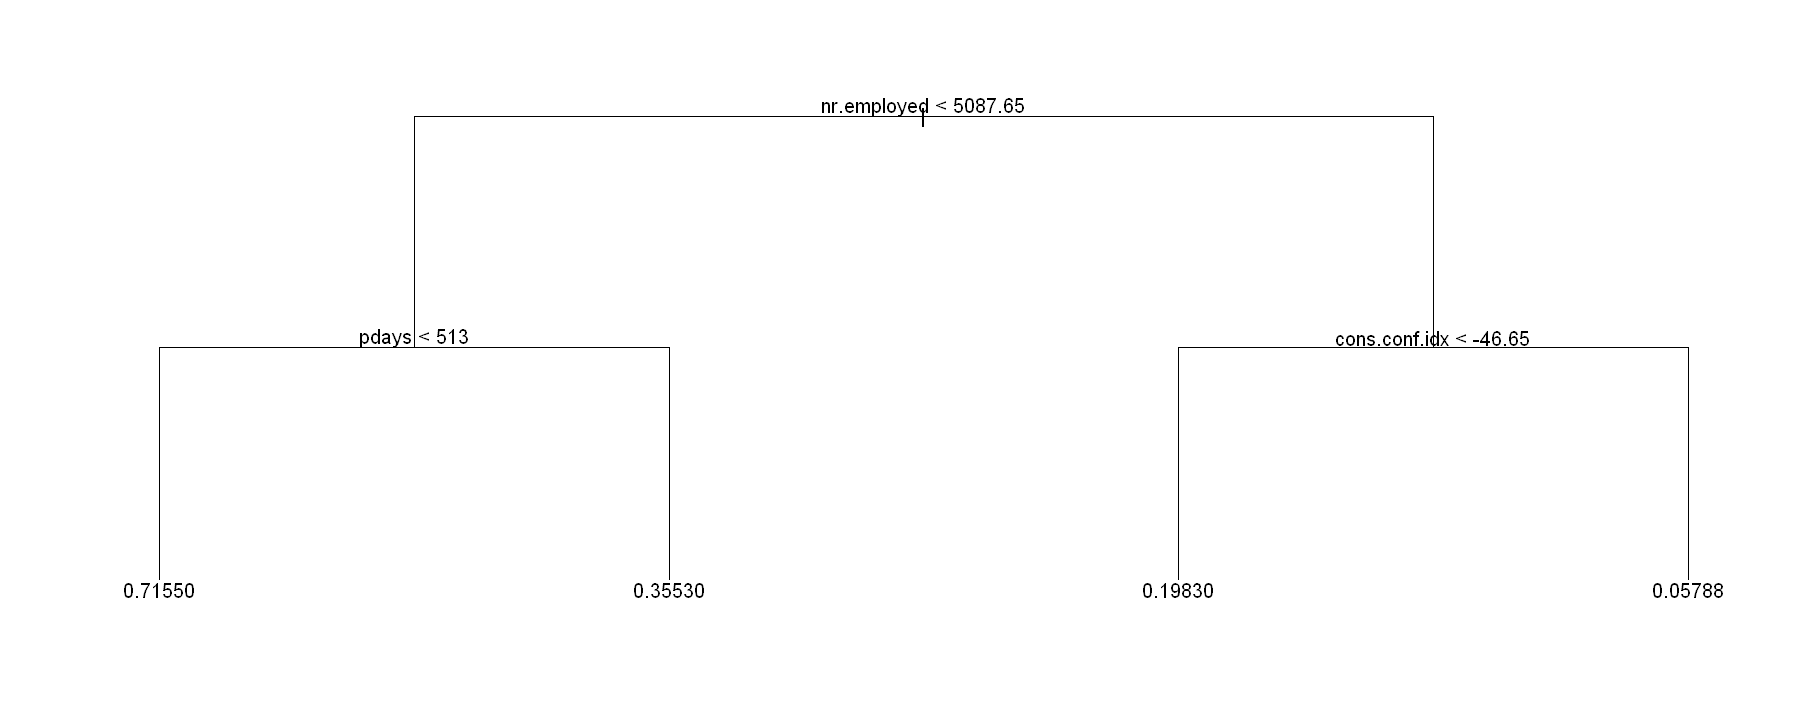

In [207]:
# Plot the classification tree
options(repr.plot.width=15, repr.plot.height=6)
plot(md_tree, type='uniform')
text(md_tree, pretty=0)

In [212]:
# Build simple decision tree model  on reduced dataset
md_tree <- tree(subscribe ~ . , data=train)

In [213]:
summary(md_tree)


Regression tree:
tree(formula = subscribe ~ ., data = train)
Variables actually used in tree construction:
[1] "nr.employed"   "pdays"         "cons.conf.idx"
Number of terminal nodes:  4 
Residual mean deviance:  0.08261 = 1156 / 14000 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.71390 -0.05903 -0.05903  0.00000 -0.05903  0.94100 

In [215]:
#having a look at predicted values
pred_tree <- predict(md_tree, newdata = test[,id_var],
type = "vector",
split = FALSE)
length(pred_tree[pred_tree<0.5])
length(pred_tree[pred_tree>0.5])

[1] 5815

[1] 185

In [227]:
#AUC
auc_tree <- AUC(pred_tree, test$subscribe, label.ordering = NULL)
print(paste('AUC of Decision Tree =',auc_tree ))

[1] "AUC of Decision Tree = 0.744511811721982"


In [217]:
# Prune the Regression Tree
set.seed(1)
cv_tree <- cv.tree(md_tree)
cv_tree

$size
[1] 4 3 2 1

$dev
[1] 1157.518 1175.168 1215.299 1424.979

$k
[1]      -Inf  17.99825  40.64150 210.02108

$method
[1] "deviance"

attr(,"class")
[1] "prune"         "tree.sequence"

In [218]:
# Best tree size
min_idx <- which.min(cv_tree$dev)
tree_size <- cv_tree$size[min_idx]
tree_dev <- cv_tree$dev[min_idx]
tree_k <- cv_tree$k[min_idx]

print(paste0('Best tree size = ', tree_size))
print(paste0('Best RSS = ', tree_dev))
print(paste0('Best alpha = ', tree_k))

[1] "Best tree size = 4"
[1] "Best RSS = 1157.51791226218"
[1] "Best alpha = -Inf"


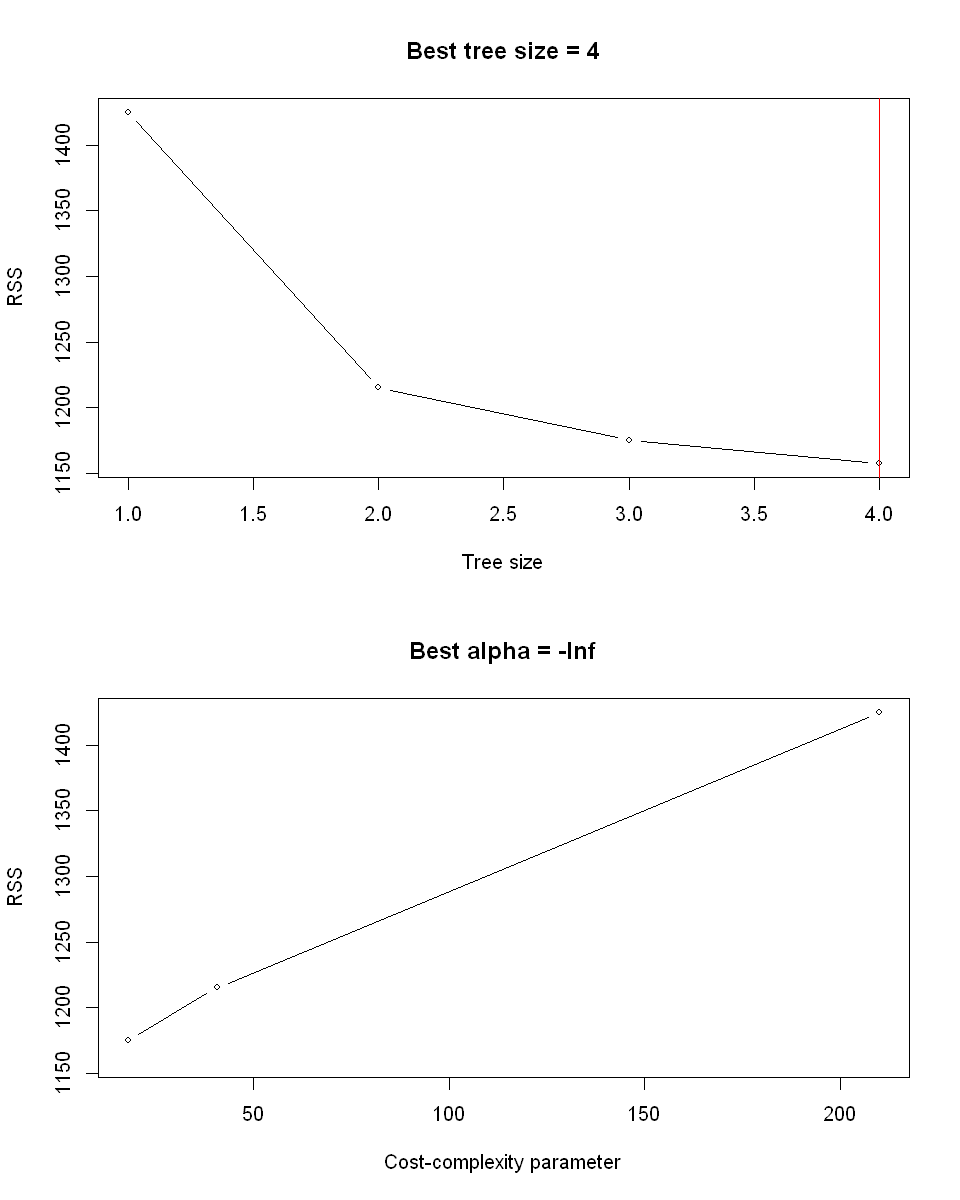

In [219]:
# Show the Decision Tree
options(repr.plot.width=8, repr.plot.height=10)
par(mfrow=c(2, 1))

# Tree size, number of nodes
plot(cv_tree$size, cv_tree$dev, type='b', cex=0.7,
     xlab='Tree size', ylab='RSS', main=paste0('Best tree size = ', tree_size)
    )
abline(v=tree_size, col='red')  # Best tree size

# Cost-complexity param, alpha
plot(cv_tree$k, cv_tree$dev, type='b', cex=0.7,
     xlab='Cost-complexity parameter', ylab='RSS',
     main=paste0('Best alpha = ', round(tree_k, 3))
    )
abline(v=tree_k, col='red')  # Best tree size

Warning message in prune.tree(md_tree, best = 5):
"best is bigger than tree size"


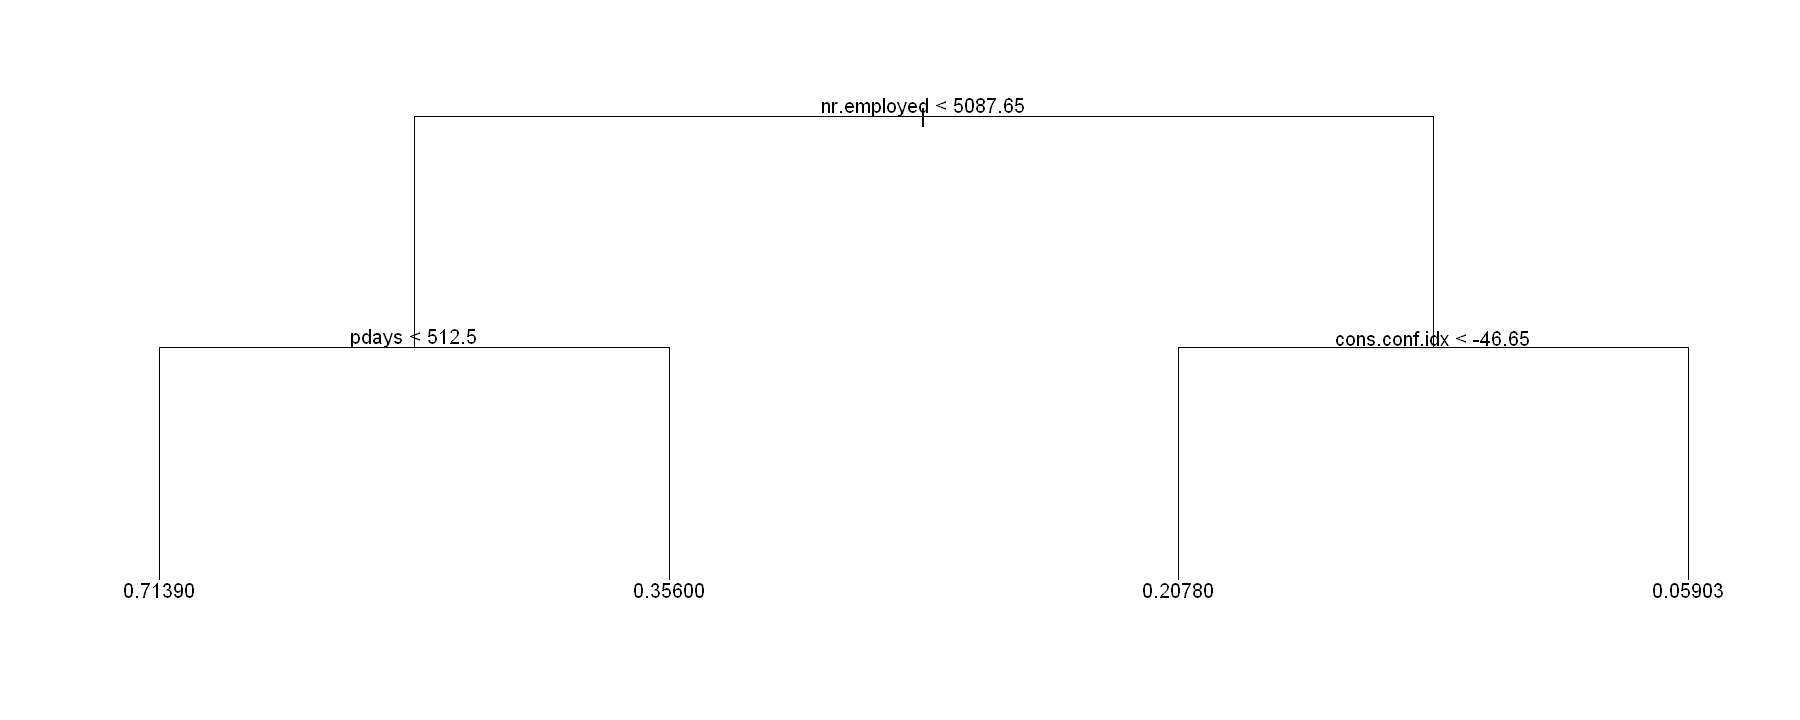

In [220]:
#Pruning here is not working as the tree is already in the best size
# Prune the tree
prune_regtree <- prune.tree(md_tree, best=5)

# Show the tree
options(repr.plot.width=15, repr.plot.height=6)
plot(prune_regtree, type='uniform')
text(prune_regtree, pretty=0)

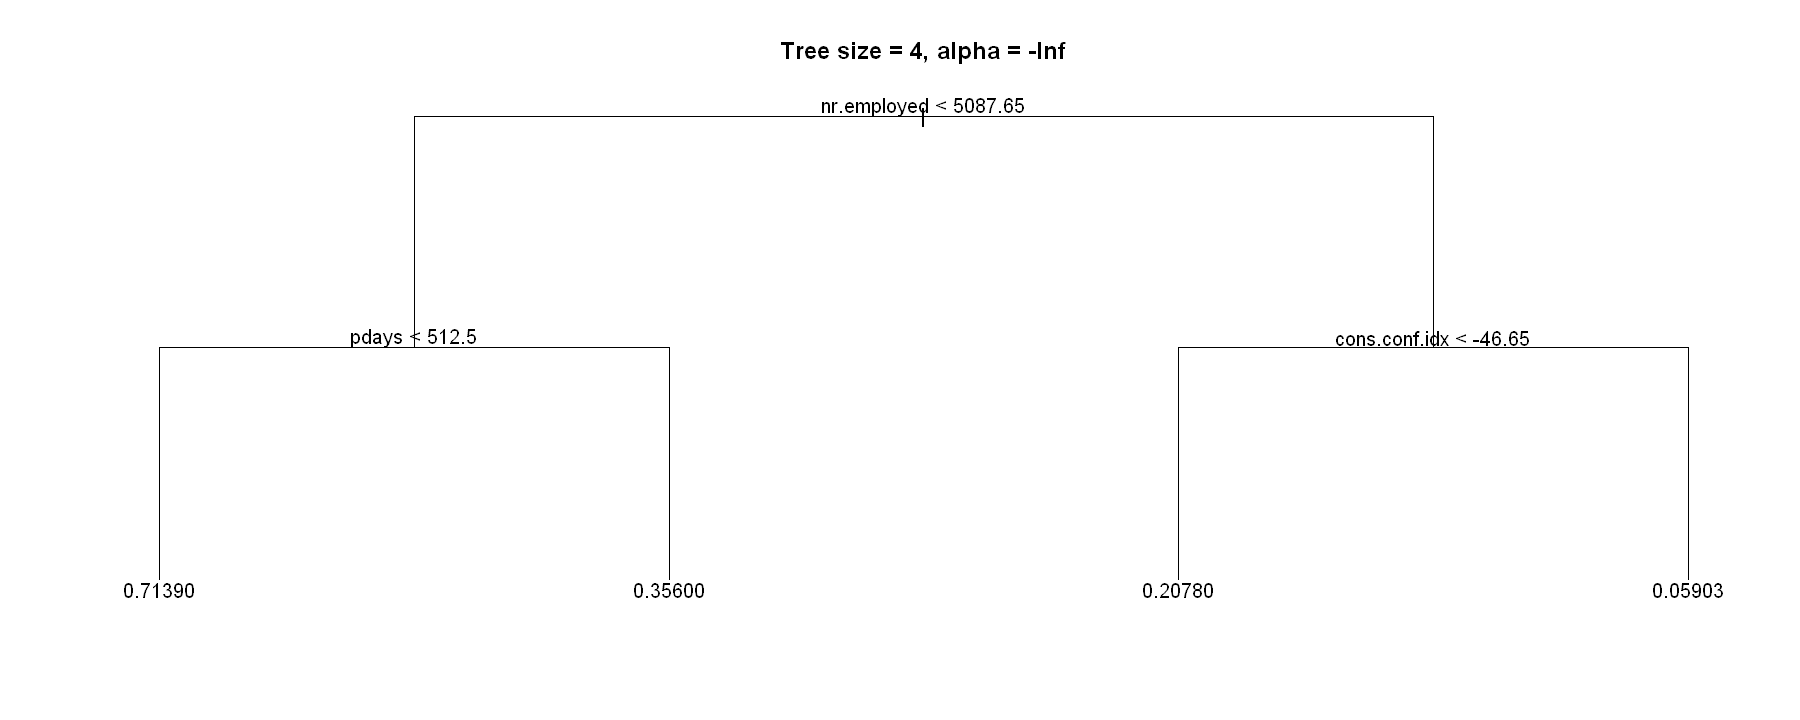

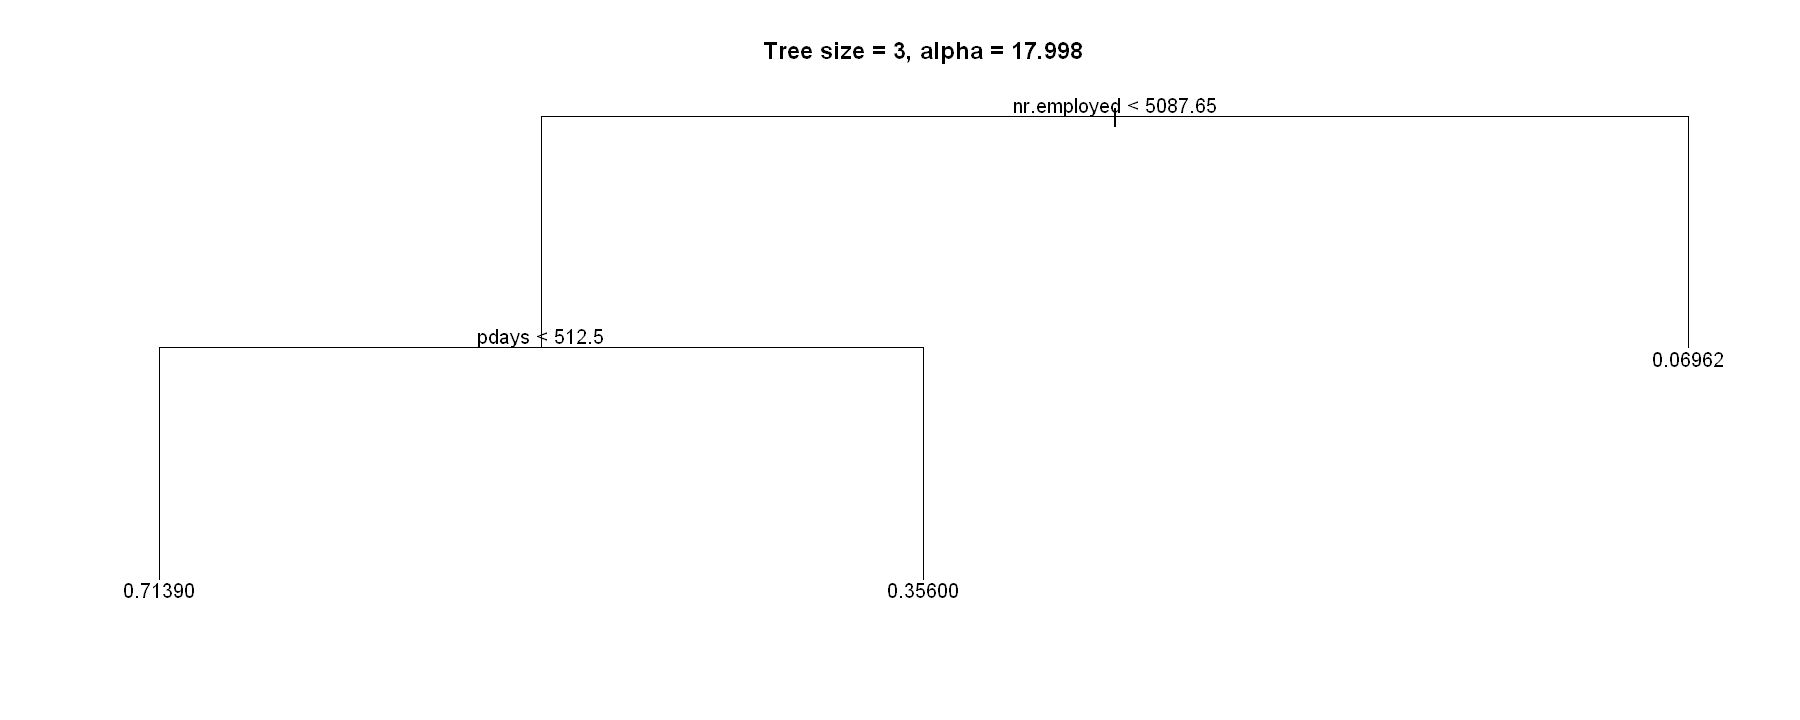

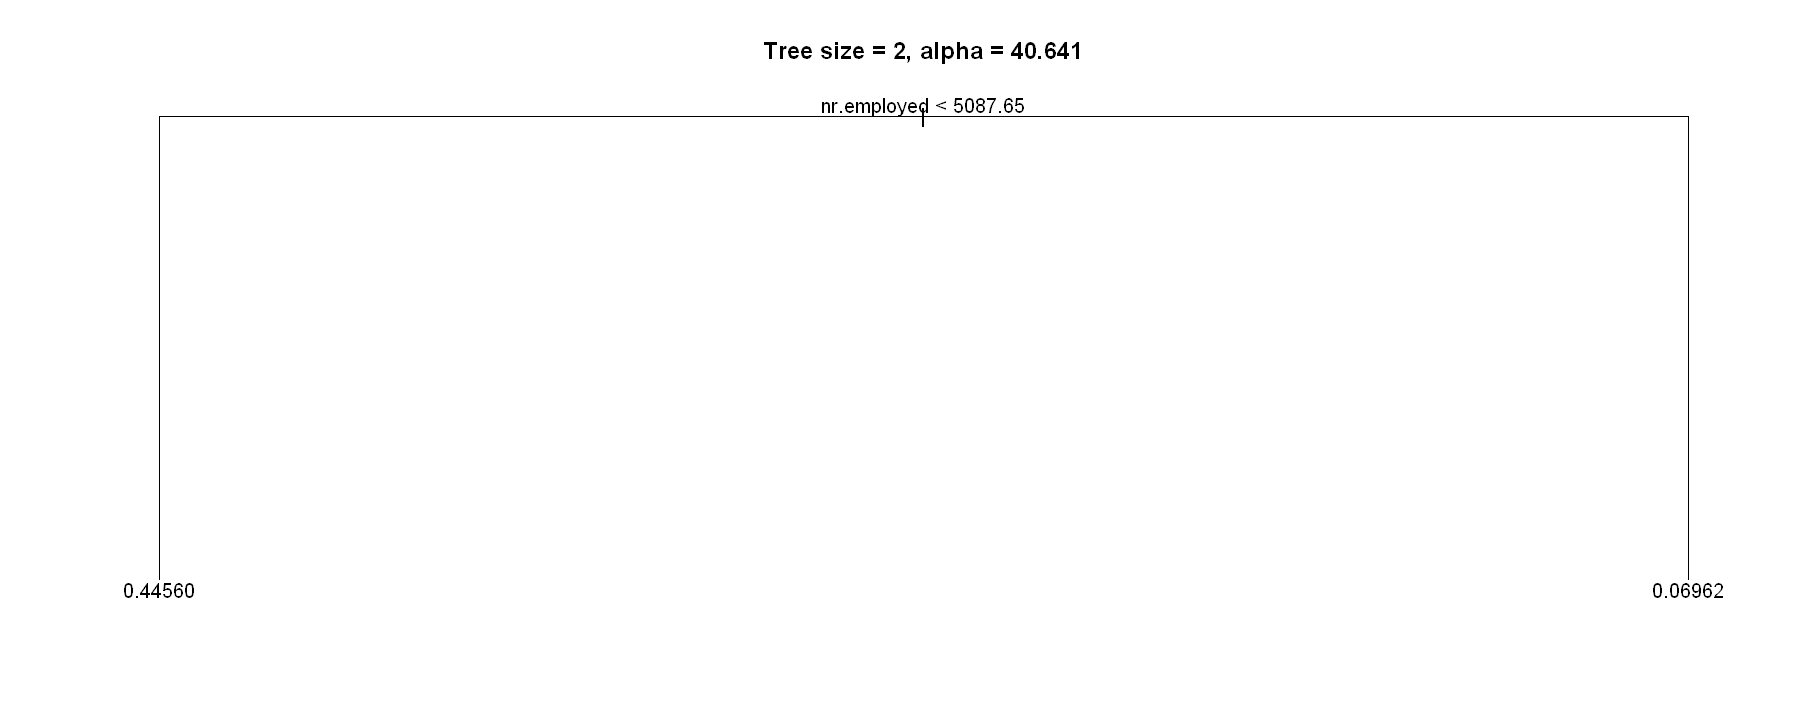

In [221]:
for (i in 1:(length(cv_tree$size)-1)) {
    
    # Prune the tree
    tree_size = cv_tree$size[i]
    alpha = cv_tree$k[i]
    prune_regtree_temp <- prune.tree(md_tree, best=tree_size)

    # Show the tree
    plot(prune_regtree_temp, type='uniform')
    text(prune_regtree_temp, pretty=0)
    title(main=paste0('Tree size = ', tree_size, ', alpha = ', round(alpha, 3)))
    }

- SVM

In [91]:
# Prepare data to fit the model
dat <- data.frame(x=train[,id_var], y=train$subscribe)

# Fit Support Vector Classifier (SVM with linear kernel) with high cost 10
md_svc <- svm(y ~ ., data=dat, kernel='linear', cost=10, scale=F)

In [93]:
# Summary the model
summary(md_svc)


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 10, scale = F)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  linear 
       cost:  10 
      gamma:  0.09090909 
    epsilon:  0.1 


Number of Support Vectors:  19477






In [95]:
# Fit Support Vector Classifier (SVM with linear kernel) with smaller cost 0.1
md_svc <- svm(y ~ ., data=dat, kernel='linear', cost=0.1, scale=F)

In [184]:
# Summary the model
summary(md_svc)


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 0.1, scale = F)


Parameters:
   SVM-Type:  eps-regression 
 SVM-Kernel:  linear 
       cost:  0.1 
      gamma:  0.09090909 
    epsilon:  0.1 


Number of Support Vectors:  19971






In [97]:
# Tuning parameter: cost
set.seed(1)
tune_svc <- tune(svm, subscribe ~ ., data=data_reduced, kernel='linear',
                 ranges=list(cost=c(0.001, 0.01, 0.1, 1.5, 10, 100)))

In [98]:
# Summary the tuned models
summary(tune_svc)


Parameter tuning of 'svm':

- sampling method: 10-fold cross validation 

- best parameters:
  cost
 0.001

- best performance: 0.09688437 

- Detailed performance results:
     cost      error  dispersion
1   0.001 0.09688437 0.006087837
2   0.010 0.09690754 0.006088760
3   0.100 0.09692360 0.006093428
4   1.500 0.09692503 0.006094220
5  10.000 0.09692389 0.006093701
6 100.000 0.09694296 0.006135048


In [225]:
# Fit Support Vector Classifier (SVM with linear kernel) with best parameter 0.001
md_svc <- svm(y ~ ., data=dat, kernel='linear', cost=0.001, scale=F)

In [229]:
# Prepare data to fit the model
dat_test <- data.frame(x=test[,id_var], y=test$subscribe)
pred_svm <- predict(md_svc, dat_test, decision.values = FALSE)

In [286]:
#AUC
auc_svm <- AUC(pred_svm, test$subscribe)
print(paste('AUC of SVM =',auc_svm ))

[1] "AUC of SVM = 0.686186820980773"


- KNN

In [105]:
# k = 1
set.seed(123)
knn1_pred <- knn(train=data_reduced[,id_var],
                 test=data_reduced[,id_var],
                 cl=data_reduced$subscribe,
                 k=1)

# Confusion matrix
print('Confusion matrix:')
table(knn1_pred, data_reduced$subscribe)

# Accuracy
acc <- mean(knn1_pred == data_reduced$subscribe)
print(paste('Accuracy =', round(acc, 2), '%'))

[1] "Confusion matrix:"


         
knn1_pred     0     1
        0 17605   845
        1   124  1426

[1] "Accuracy = 0.95 %"


In [106]:
library(class)

# k = 3
set.seed(123)
knn1_pred <- knn(train=data_reduced[,id_var],
                 test=data_reduced[,id_var],
                 cl=data_reduced$subscribe,
                 k=3)

# Confusion matrix
print('Confusion matrix:')
table(knn1_pred, data_reduced$subscribe)

# Accuracy
acc <- mean(knn1_pred == data_reduced$subscribe)
print(paste('Accuracy =', round(acc, 2), '%'))

[1] "Confusion matrix:"


         
knn1_pred     0     1
        0 17389  1317
        1   340   954

[1] "Accuracy = 0.92 %"


In [108]:
# cross validation for k=1
# Set up cross-validation
rdesc = makeResampleDesc("CV", iters=10)

# Define the model
lnr_knn <- makeLearner("classif.kknn", predict.type="prob", fix.factors.prediction=T, k=1)

# Define the task
task_logreg <- makeClassifTask(id="subscribe", data=data_reduced, target="subscribe")

# Run the k-fold CV
resample(lnr_knn, task_logreg, rdesc, measures=list(mlr::auc))

Resampling: cross-validation

Measures:             auc       

[Resample] iter 1:    0.6206411 

[Resample] iter 2:    0.6124426 

[Resample] iter 3:    0.6384626 

[Resample] iter 4:    0.6231146 

[Resample] iter 5:    0.6007124 

[Resample] iter 6:    0.6076833 

[Resample] iter 7:    0.6011979 

[Resample] iter 8:    0.6221888 

[Resample] iter 9:    0.6327345 

[Resample] iter 10:   0.5982253 




Aggregated Result: auc.test.mean=0.6157403






Resample Result
Task: subscribe
Learner: classif.kknn
Aggr perf: auc.test.mean=0.6157403
Runtime: 4.2675

In [109]:
# cross validation for k=100
# Set up cross-validation
rdesc = makeResampleDesc("CV", iters=10)

# Define the model
lnr_knn <- makeLearner("classif.kknn", predict.type="prob", fix.factors.prediction=T, k=100)

# Define the task
task_logreg <- makeClassifTask(id="subscribe", data=data_reduced, target="subscribe")

# Run the k-fold CV
resample(lnr_knn, task_logreg, rdesc, measures=list(mlr::auc))

Resampling: cross-validation

Measures:             auc       

[Resample] iter 1:    0.7919820 

[Resample] iter 2:    0.7352758 

[Resample] iter 3:    0.7575773 

[Resample] iter 4:    0.7631944 

[Resample] iter 5:    0.7681406 

[Resample] iter 6:    0.7859541 

[Resample] iter 7:    0.8130209 

[Resample] iter 8:    0.7948273 

[Resample] iter 9:    0.7889840 

[Resample] iter 10:   0.7491797 




Aggregated Result: auc.test.mean=0.7748136






Resample Result
Task: subscribe
Learner: classif.kknn
Aggr perf: auc.test.mean=0.7748136
Runtime: 8.0139

In [110]:
# to find the best k for KNN model
# Set up cross-validation
rdesc = makeResampleDesc("CV", iters=10)

# Define the model
lnr_knn <- makeLearner("classif.kknn", predict.type="prob", fix.factors.prediction=T)

# Define the task
task_logreg <- makeClassifTask(id="subscribe", data=data_reduced, target="subscribe")

# Set hyper parameter tuning
discrete_ps = makeParamSet(
  makeDiscreteParam("k", values = c(1, 5, 10, 20, 50, 100, 200, 300))
)
ctrl = makeTuneControlGrid()

# Run the hyper parameter tuning with k-fold CV
res <- tuneParams(lnr_knn, task=task_logreg, resampling=rdesc,
  par.set=discrete_ps, control=ctrl, measures=list(mlr::acc))

[Tune] Started tuning learner classif.kknn for parameter set:

      Type len Def                   Constr Req Tunable Trafo
k discrete   -   - 1,5,10,20,50,100,200,300   -    TRUE     -

With control class: TuneControlGrid

Imputation value: -0

[Tune-x] 1: k=1

[Tune-y] 1: acc.test.mean=0.8499500; time: 0.1 min

[Tune-x] 2: k=5

[Tune-y] 2: acc.test.mean=0.8829500; time: 0.1 min

[Tune-x] 3: k=10

[Tune-y] 3: acc.test.mean=0.8922500; time: 0.1 min

[Tune-x] 4: k=20

[Tune-y] 4: acc.test.mean=0.8972500; time: 0.1 min

[Tune-x] 5: k=50

[Tune-y] 5: acc.test.mean=0.8987000; time: 0.1 min

[Tune-x] 6: k=100

[Tune-y] 6: acc.test.mean=0.9011000; time: 0.1 min

[Tune-x] 7: k=200

[Tune-y] 7: acc.test.mean=0.9007500; time: 0.2 min

[Tune-x] 8: k=300

[Tune-y] 8: acc.test.mean=0.9003000; time: 0.2 min

[Tune] Result: k=100 : acc.test.mean=0.9011000



In [295]:
auc_knn <- 0.9011000 #for the value of k=100

- random forest

In [289]:
#split the data 
parts = createDataPartition(data_reduced$subscribe, p = .8, list = F)
train = data[parts, ]
test = data[-parts, ]

In [290]:
# Fit random forests model
set.seed(1)
md_rf <- randomForest(subscribe ~ ., data=train, mtry=6, importance=T) 
md_rf

Warning message in randomForest.default(m, y, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"



Call:
 randomForest(formula = subscribe ~ ., data = train, mtry = 6,      importance = T) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 6

          Mean of squared residuals: 0.08077844
                    % Var explained: 20.4

In [291]:
# Make prediction
pred_rf <- predict(md_rf, newdata=test)

# Evaluation: MSE
mean((pred_rf - test$subscribe) ^ 2)

[1] 0.07366549

In [292]:
#AUC
auc_rforest <- AUC(pred_rf, test$subscribe)
print(paste('AUC of Random Forest =',auc_rforest ))


[1] "AUC of Random Forest = 0.793158903066153"


In [293]:
# Set up cross-validation
rdesc = makeResampleDesc("CV", iters=100)

# Define the model
lnr_logreg <- makeLearner("classif.randomForest", predict.type="prob", fix.factors.prediction=T)

# Define the model
task_logreg <- makeClassifTask( data=data_reduced, target='subscribe')

# Run the k-fold CV
resample(lnr_logreg, task_logreg, rdesc, measures=list(mlr::auc))

Resampling: cross-validation

Measures:             auc       

[Resample] iter 1:    0.7519803 

[Resample] iter 2:    0.7570958 

[Resample] iter 3:    0.7101961 

[Resample] iter 4:    0.6862542 

[Resample] iter 5:    0.8138815 

[Resample] iter 6:    0.7256944 

[Resample] iter 7:    0.7373611 

[Resample] iter 8:    0.8563429 

[Resample] iter 9:    0.7307988 

[Resample] iter 10:   0.7730287 

[Resample] iter 11:   0.8241554 

[Resample] iter 12:   0.7534167 

[Resample] iter 13:   0.7905983 

[Resample] iter 14:   0.8314394 

[Resample] iter 15:   0.7368981 

[Resample] iter 16:   0.7690286 

[Resample] iter 17:   0.7369013 

[Resample] iter 18:   0.7393162 

[Resample] iter 19:   0.7786645 

[Resample] iter 20:   0.8238893 

[Resample] iter 21:   0.7568058 

[Resample] iter 22:   0.8028571 

[Resample] iter 23:   0.8149020 

[Resample] iter 24:   0.8455497 

[Resample] iter 25:   0.7763042 

[Resample] iter 26:   0.8623596 

[Resample] iter 27:   0.7547429 

[Resample] iter 28

Resample Result
Task: data_reduced
Learner: classif.randomForest
Aggr perf: auc.test.mean=0.7714114
Runtime: 1105.82

In [294]:
# Set up cross-validation
rdesc = makeResampleDesc("CV", iters=10)

# Define the model
lnr_logreg <- makeLearner("classif.randomForest", predict.type="prob", fix.factors.prediction=T)

# Define the model
task_logreg <- makeClassifTask( data=data_reduced, target='subscribe')

# Run the k-fold CV
resample(lnr_logreg, task_logreg, rdesc, measures=list(mlr::auc))

Resampling: cross-validation

Measures:             auc       

[Resample] iter 1:    0.7726876 

[Resample] iter 2:    0.7867837 

[Resample] iter 3:    0.7681209 

[Resample] iter 4:    0.8140111 

[Resample] iter 5:    0.7667272 

[Resample] iter 6:    0.7604788 

[Resample] iter 7:    0.7462352 

[Resample] iter 8:    0.7595831 

[Resample] iter 9:    0.7728304 

[Resample] iter 10:   0.7454116 




Aggregated Result: auc.test.mean=0.7692870






Resample Result
Task: data_reduced
Learner: classif.randomForest
Aggr perf: auc.test.mean=0.7692870
Runtime: 108.035

In [306]:
#AUC of all the models 
print(paste('AUC of Logistic Regression =',auc_logreg ))
print(paste('AUC of Decision Tree =',auc_tree ))
print(paste('AUC of Random Forest =',auc_rforest ))
print(paste('AUC of KNN =',auc_knn ))
print(paste('AUC of SVM =',auc_svm ))

[1] "AUC of Logistic Regression = 0.7842233"
[1] "AUC of Decision Tree = 0.744511811721982"
[1] "AUC of Random Forest = 0.793158903066153"
[1] "AUC of KNN = 0.9011"
[1] "AUC of SVM = 0.686186820980773"
